                      Naive Bayes Binary Classifier

The Naive Bayes binary classifier is an application of a two-class classification algorithm. The provided code is specifically designed for classifying grayscale images containing handwritten digits, focusing on the digits 0 and 1. The code utilizes the MNIST dataset, an online database consisting of grayscale images of handwritten digits ranging from 0 to 9. For convenience, only the .mat files containing digits 0 and 1 are uploaded here.

STEP1:Loading Data

To start, we load the .mat data subsets of zeros and ones into 3D numpy arrays. The geneNewData.py file creates training sets for both zeros and ones, each having 5000 images. Additionally, it generates test sets for zeros and ones with 980 and 1,135 samples, respectively.

Given that each image sample is 28x28 pixels,the input data structure(2 trainsets adn 2 testsets) is a 3D array -a collection of 2D image arrays of dimensions of nx28x28,where n is the number of samples.

The imshow() function in pyplot module of matplotlib library is used to display data as an image.One can use it to display any image in the train and tests sets.

 STEP2:Feature Extraction

Features are simply the independent variables that are chosen carefully to build our model.In case of a grascale image, each pixel value is a sigle number that represents the brightness of the pixel.The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255.Typically, zero is taken to be black, and 255 is taken to be white.

We will be working with a 2D feature vector that comprises the mean and the standard deviation of all the pixel values within an image array.

Note that the features should only be extracted from the train datasets.

STEP3:Parameters Calculation

A supervised machine learning model is defined by a set of parameteres. Based on the 2D datapoints of features generated for the two class naive bayes classifiers, the following parameters should be calculated:

1.Mean of feature1 for digit0 2.Variance of feature1 for digit0 3.Mean of feature2 for digit0 4.Variance of feature2 for digit0 5.Mean of feature1 for digit1 6.Variance of feature1 for digit1 7.Mean of feature2 for digit1 8.Variance of feature2 for digit1.

STEP4:Applying the Maximum Likelihood function

The calculated Mean and Variance capture the data distribution for the training dataset.Now we will iterate through the test dataset and calculate the mean (feature1) and standard deviation (feature2)of the pixel brightness for each image like we did for the training dataset.This allows us to compute the probability of observing the calculated feature among the normally distributed training dataset for each label.Therefore, we will use the normal distribution equation for each image, we need the following :

P(feature1|y=0)P(feature2|y=0)P(feature1|y=1)P(feature2|y=1)

Based on this information, as well as the assumption that P(y=0)=P(y=1)=0.5,we can calculate the posterior probabilities of the labels as follows:

P(y=0|feature1,feature2)=P(feature1|y=0)*P(feature2|y=0)*P(y=0); P(y=1|feature1,feature2)=P(feature1|y=1)*P(feature2|y=1)*P(y=1).

For each data point, the image is assigned to the label with the greater probability given our 2 selected features.

STEP5.Evaluating the model

The accuracy is simply calculated -dividing the number of right predictions by the total number of images.

In [1]:
#Importing the required libraries
import numpy                                   #for linear algebra
import scipy.io                                #working with different file formats
import math                                    #for mathematical calculations
import geneNewData                             #python file containing functions or classes related to generating new data.
import matplotlib.pyplot as plt                #for creating visualizations.                    
from math import sqrt,pi,exp

In [2]:

def feature_extraction(data):
    feat1 = []
    feat2 = []
    
    feat1 = [numpy.average(i) for i in data]
    feat2 = [numpy.std(i) for i in data]
    
    return feat1, feat2

In [3]:
def normal_distribution(x, mean, var):
    
    dist = (1 / (numpy.sqrt(2 * numpy.pi * var)))  * numpy.exp(-((x - mean) ** 2) / (2*var))
    return dist

In [4]:
def main():
    #Step1
    seed = '1489'
    geneNewData.geneData(seed)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train' + seed)
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train' + seed)
    Numpyfile2 = scipy.io.loadmat('digit0_testset')
    Numpyfile3 = scipy.io.loadmat('digit1_testset')
    train0 = Numpyfile0.get('target_img')
    train1 = Numpyfile1.get('target_img')
    test0 = Numpyfile2.get('target_img')
    test1 = Numpyfile3.get('target_img')
    print([len(train0),len(train1),len(test0),len(test1)])
    print('Your trainset and testset are generated successfully!')
    PIL_matrix = train0[1].reshape((28,28))
    plt.imshow(PIL_matrix)
    
    #pass
    
    # Task - 01
    # Features are extracted for train dataset
    train0_feat1, train0_feat2 = feature_extraction(train0)
    train1_feat1, train1_feat2 = feature_extraction(train1)
    
    # Task - 02
    # Parameters are calculated
    Mean_of_feature1_for_digit0 = numpy.mean(train0_feat1)
    Variance_of_feature1_for_digit0 = numpy.var(train0_feat1)
    Mean_of_feature2_for_digit0 = numpy.mean(train0_feat2)
    Variance_of_feature2_for_digit0 = numpy.var(train0_feat2)
    Mean_of_feature1_for_digit1 = numpy.mean(train1_feat1)
    Variance_of_feature1_for_digit1 = numpy.var(train1_feat1)
    Mean_of_feature2_for_digit1 = numpy.mean(train1_feat2)
    Variance_of_feature2_for_digit1 = numpy.var(train1_feat2)
    
    # Task - 03 : Part - 01
    # Features are extracted for test dataset
    test = numpy.concatenate((test0, test1))
    test_feat1, test_feat2 = feature_extraction(test)
    
    # Task - 03 : Part - 02
    # NB Classifier formula is implemented
    prior_prob = 0.5
    post_prob_0 = prior_prob * normal_distribution(test_feat1, Mean_of_feature1_for_digit0, Variance_of_feature1_for_digit0) * normal_distribution(test_feat2, Mean_of_feature2_for_digit0, Variance_of_feature2_for_digit0)
    post_prob_1 = prior_prob * normal_distribution(test_feat1, Mean_of_feature1_for_digit1, Variance_of_feature1_for_digit1) * normal_distribution(test_feat2, Mean_of_feature2_for_digit1, Variance_of_feature2_for_digit1)
    
    # Task - 03 : Part - 03
    # Test data points are predicted using implemented classifier
    compare = numpy.greater(post_prob_1, post_prob_0)
    compare_num = compare.astype(int)
   
    # Task - 04     
    # Accuracy of predictions for testset for both digit0 and digit1
    
    temp = compare_num[:980]
    predicted_0 = temp[numpy.where(temp == 0)].size
    accuracy_0 = predicted_0 / len(test0)
    
    
    predicted_1 = numpy.count_nonzero(compare_num[980:])
    accuracy_1 = predicted_1 / len(test1)
    

    print("Mean_of_feature1_for_digit0:", Mean_of_feature1_for_digit0) 
    print("Variance_of_feature1_for_digit0:", Variance_of_feature1_for_digit0)
    print("Mean_of_feature2_for_digit0:", Mean_of_feature2_for_digit0) 
    print("Variance_of_feature2_for_digit0:", Variance_of_feature2_for_digit0)
    print("Mean_of_feature1_for_digit1:", Mean_of_feature1_for_digit1) 
    print("Variance_of_feature1_for_digit1:", Variance_of_feature1_for_digit1)
    print("Mean_of_feature2_for_digit1:", Mean_of_feature2_for_digit1)
    print("Variance_of_feature2_for_digit1:", Variance_of_feature2_for_digit1)
    
    print("Accuracy_for_digit0testset:",accuracy_0)  
    print("Accuracy_for_digit1testset:",accuracy_1)
                          


Hi
[5000, 5000, 980, 1135]
Your trainset and testset are generated successfully!
Mean_of_feature1_for_digit0: 44.243467091836735
Variance_of_feature1_for_digit0: 114.33752866670913
Mean_of_feature2_for_digit0: 87.47669294424144
Variance_of_feature2_for_digit0: 99.92754098412034
Mean_of_feature1_for_digit1: 19.37459821428571
Variance_of_feature1_for_digit1: 31.23563827340008
Mean_of_feature2_for_digit1: 61.36242418114679
Variance_of_feature2_for_digit1: 82.3326954460368
Accuracy_for_digit0testset: 0.9173469387755102
Accuracy_for_digit1testset: 0.9233480176211454


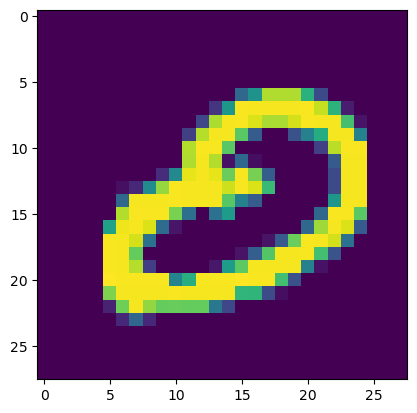

In [5]:
main()